<a href="https://colab.research.google.com/github/MinhDinh-4869/GameAwardPrediction/blob/main/Game_Awards_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os

path = '/content/gdrive/My Drive/CompulsoryElectiveData/'
os.chdir(path)

Mounted at /content/gdrive


In [ ]:
import numpy as np

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def computeMeanScore(data):
  items = data.strip().split(' ')
  items = [float(x.strip()) for x in items]
  return float("{:.2f}".format(np.mean(np.array(items))))

def computeSumScore(data):
  items = data.strip().split(' ')
  items = [float(x.strip()) for x in items]
  #return 1/(float("{:.2f}".format(np.sum(np.array(items))))/100 + 1)
  return 1/(float("{:.2f}".format(np.sum(np.array(items))))/100 + 1)
  #return sigmoid(float("{:.2f}".format(np.sum(np.array(items)))))

def computeStandardDev(data):
  items = data.strip().split(' ')
  items = [float(x.strip()) for x in items]
  return 1/((np.std(np.array(items))) + 1)

def getLabel(data):
  result = sum([int(x) for x in data])
  if result > 0:
    return 1
  return 0

def processData(filename):
  filehandle = open(filename)
  X_train = []
  Y_train = []
  for line in filehandle.readlines()[1:]:
    item = line.strip().split(',')[-10:] #remove names and years
    #datapoint = [computeMeanScore(item[0])/100, computeMeanScore(item[1])/10, computeSumScore(item[2])] + [float(x) for x in item[3:6]]
    datapoint = [computeMeanScore(item[0])/100, computeMeanScore(item[1])/10, computeSumScore(item[2])] + [float(x) for x in item[3:6]]
    #print(datapoint)
    print(computeStandardDev(item[2]))
    label = getLabel(item[6:10])#int(item[-1]) #6, 7, 8,9

    X_train.append(datapoint)
    Y_train.append(label)
  return np.asarray(X_train, dtype='float32'),np.asarray(Y_train, dtype='float32')

data, label = processData('GameAwardsDataset2.csv')

0.0005724363072372106
0.001271304262772299
0.0006174805437350455
0.0010319917440660474
1.0
1.0
0.0038897075808186072
0.008217118310370954
0.012474476573140367
0.0006916186772747227
0.0009545313476075231
1.0
0.001976224004290587
1.0
1.0
0.008888888888888889
1.0
0.051572109322655046
0.02665368790385462
0.007064576812732522
0.016755798684445402
1.0
0.03017944880127956
1.0
0.18795247918520225
0.04286280954741517
0.03389830508474576
1.0
1.0
0.003062429984267013
0.0011886421272357184
0.06896551724137931
1.0
1.0
1.0
0.003952569169960474
0.005128205128205128
0.0006524916706168378
1.0
0.004952779383565121
1.0
1.0
0.009950248756218905
0.003189792663476874
1.0
1.0
0.01694915254237288
0.0010328242923951865
0.0011055570594479484
1.0
0.0005867712600360535
0.018518518518518517
1.0
0.05128205128205128
1.0
1.0
1.0
0.029850746268656716
1.0
0.0015487462688049834
1.0
0.002886002886002886
1.0
0.1
1.0
1.0
1.0
1.0
1.0
0.013629370909829927
1.0
1.0
0.09090909090909091
1.0
0.0006902780543698893
1.0
0.0079670015

In [ ]:

def bitwise_xor(x1, x2):
  return (np.multiply(x1, x2) + np.multiply(1-x1, 1-x2))
def validate(x_val, y_val, w):
  # n 6 6 1 n 1
  y_pred = sigmoid(x_val.dot(w.T))
  y_pred = (y_pred > 0.7)
  return np.sum(bitwise_xor(y_pred, y_val)) / np.shape(y_val)[0]

def loss(y_true, y_pred):
  return -1 * (y_true.T.dot(np.log(y_pred)) + (1 - y_true).T.dot(np.log(1 - y_pred)))

def computeLoss(x_train, y_train, w):
    y_pred = sigmoid(x_train.dot(w.T))
    return -1 * (y_train.T.dot(np.log(y_pred)) + (1 - y_train).T.dot(np.log(1 - y_pred)))

def logistics_regression(X_train, Y_train, X_val, Y_val, epochs=50, eta=0.001):
  w_init = np.random.random((1, 6))
  print(w_init)
  W = [w_init]
  for _ in range(epochs):
    ids = np.random.permutation(X_train.shape[0])
    for id in ids:
      xi = X_train[id, :].reshape(1, 6)
      yi = Y_train[id].reshape(1,1)

      zi = xi.dot(W[-1].T) #1 x 6 6 x1
      ai = sigmoid(zi[0]).reshape(1,1)

      dw = (ai - yi).dot(xi) #1 1 1 6
      w_new = W[-1] - eta*dw

      print('epochs no.', _)
      #print('loss: ', loss[-1])
      print('accuracy: ',validate(X_val, Y_val, w_new), ' loss: ', computeLoss(X_train, Y_train, w_new))
      if np.linalg.norm(W[-1]- w_new) < 1e-4:
      #if loss[-1] < 0.01:
        return W
      print(np.linalg.norm(W[-1]- w_new))
      W.append(w_new)
  return W


In [ ]:
#MLP
def mlp_predict(x, w1, w2, w3):
  z1 = x.dot(w1.T) #1 x 6 x 6 x 10 --> 1 x 10
  a1 = sigmoid(z1[0]).reshape(1, 10)

  z2 = a1.dot(w2.T) #1 x 10 x 10 x 10 --> 1 x 10
  a2 = sigmoid(z2[0]).reshape(1, 10)

  z3 = a2.dot(w3.T) #1 x 10 x 10 x 1 --> 1 x 1
  a3 = sigmoid(z3[0]).reshape(1, 1)
  return a3

def forward(X, w1, w2, w3):
  N = X.shape[0]

  z1 = X.dot(w1.T) #N x 6 x 6 x 10 --> N x 10
  a1 = sigmoid(z1).reshape(N, 10)

  z2 = a1.dot(w2.T) #N x 10 x 10 x 10 --> N x 10
  a2 = sigmoid(z2).reshape(N, 10)

  z3 = a2.dot(w3.T) #N x 10 x 10 x 1 --> N x 1
  a3 = sigmoid(z3).reshape(N, 1)
  return a3

def mlp_validate(x_val, y_val, w1, w2, w3):
  y_pred = forward(x_val, w1, w2, w3)
  y_pred = (y_pred > 0.7)
  return np.sum(bitwise_xor(y_pred, y_val)) / np.shape(y_val)[0]

def mlp(X_train, Y_train, X_val, Y_val, epochs=50, eta=0.01):
  #nonbiased
  w0 = np.random.random((10, 6))
  w1 = np.random.random((10,10))
  w2 = np.random.random((1, 10))

  W0 = [w0]
  W1 = [w1]
  W2 = [w2]
  for _ in range(epochs):
    idx = np.random.permutation(X_train.shape[0])
    #stochastic gradient descent
    for i in idx:
      xi = X_train[i, :].reshape(1, 6)
      yi = Y_train[i, :].reshape(1, 1)

      z1 = xi.dot(W0[-1].T) #1 x 6 x 6 x 10 --> 1 x 10
      a1 = sigmoid(z1[0]).reshape(1, 10)

      z2 = a1.dot(W1[-1].T) #1 x 10 x 10 x 10 --> 1 x 10
      a2 = sigmoid(z2[0]).reshape(1, 10)

      z3 = a2.dot(W2[-1].T) #1 x 10 x 10 x 1 --> 1 x 1
      a3 = sigmoid(z3[0]).reshape(1, 1)

      #back propagation
      e3 = a3 - yi
      dw2 = e3.T.dot(a2)

      e2 = np.multiply(e3.dot(W2[-1]), np.multiply(a2, 1 - a2))
      dw1 = e2.T.dot(a1)

      e1 = np.multiply(e2.dot(W1[-1]), np.multiply(a1, 1 - a1))
      dw0 = e1.T.dot(xi)

      w0_n = W0[-1] - eta*dw0
      w1_n = W1[-1] - eta*dw1
      w2_n = W2[-1] - eta*dw2

      accu = mlp_validate(X_val, Y_val, w0_n, w1_n, w2_n)
      print(_)
      print('accuracy: ', accu)
      if(np.linalg.norm(W0[-1] - w0_n) < 1e-4) and (np.linalg.norm(W1[-1] - w1_n) < 1e-4) and (np.linalg.norm(W2[-1] - w2_n) < 1e-4) and accu > 0.9:
        return W0, W1, W2
      print(np.linalg.norm(W0[-1] - w0_n))
      print(np.linalg.norm(W1[-1] - w1_n))
      print(np.linalg.norm(W2[-1] - w2_n))
      print
      W0.append(w0_n)
      W1.append(w1_n)
      W2.append(w2_n)
  return W0, W1, W2


In [ ]:
import tensorflow as tf
indices = np.random.permutation(data.shape[0])

X_train, Y_train = data[:400, :], label[:400]
X_val, Y_val = data[400:, :], label[400:]

#X_train, Y_train = data[indices[:350]], label[indices[:350]]
#X_val, Y_val = data[indices[350:]], label[indices[350:]]


#X_train, Y_train = data, label
#X_val, Y_val = data, label

X_train = X_train.reshape(X_train.shape[0], 6)
X_val = X_val.reshape(X_val.shape[0], 6)

Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_val = Y_val.reshape(Y_val.shape[0], 1)

Y_train1 = tf.keras.utils.to_categorical(Y_train, 2)
Y_val1 = tf.keras.utils.to_categorical(Y_val, 2)


print(np.sum(Y_val) / Y_val.shape[0])
print(np.sum(Y_train) / Y_train.shape[0])

0.037037037037037035
0.4425


In [ ]:
print(indices)

[141 212 229 104  73 211  94  70 305 139 119 291   5 393 134  35 373 366
 303 372 371 296 331  92 233  62 158 163 407 414 380 295 171 111   2 190
 311 121  38 149  36  53 337 223 109 424  21  28  88 181 283  51 254 377
  66 416 318 180  97 156 324 154 315 217 348  68 178 263  34 173 282  30
 131 252 349 157 269 338 347  29 390  86  95 257 234  71  23 292 409 322
 185 164 118 413  72 219 280  96 363  84 130 192 317 101 267 389   4  10
 253  15 354 300 388 287 247 415 335  25 299 183  69 228 369 114 399 350
  83  93  81  58 140 187  90 231 361 275 100  39 186 419  85  82 124 218
 421 344 397 408 395 261 307 325 357 147  19 203 284 206 309  55 329 193
 319 398  31 244 298 410 243 159 273   3 323 351 394 105 202 245 204 246
 406 215  50  77 151  74 239 208 224 199 195 418 321  42 230 120 358   0
 264  46 116 207 201 392 102 135 248 339 221 281 152 383 145 336 404 148
 385  56 258  20  26  76 184 138 401 128 379 146 136 286 387 272 166  27
  47 386 289 242  91 214  61 426 374 382 112  60 24

In [ ]:
W = logistics_regression(X_train, Y_train, X_val, Y_val)

In [ ]:
W1, W2, W3 = mlp(X_train, Y_train, X_val, Y_val)

In [ ]:
#elden ring
a = [computeMeanScore('96 94 90 96')/100, computeMeanScore('7.8 6.9 7 6.4 7.7')/10, computeSumScore('10646 4856 1031 469 2508')] + [1,1,5]
a = np.asarray(a, dtype = 'float32')
#a = X_train[323]
#print(a)
#stray
b = [computeMeanScore('82 83 83')/100, computeMeanScore('8.4 8.3 8.5')/10, computeSumScore('508 163 1664')] + [0,0,3]
b = np.asarray(b, dtype='float32')

#gow : ragnarok
c = [computeMeanScore('94 100')/100, computeMeanScore('8.0 6')/10, computeSumScore('5833 509')] + [1,1,2]
c = np.asarray(c, dtype='float32')

#one piece
d = [computeMeanScore('35')/100, computeMeanScore('2.3')/10, computeSumScore('7')] + [0,0,1]
d = np.asarray(d, dtype='float32')

#martha is dead
e = [computeMeanScore('73 65 72 58 65')/100, computeMeanScore('7.3 6.8 5.2 7 7')/10, computeSumScore('61 14 34 12 31')] + [0,0,5]
e = np.asarray(d, dtype='float32')

#Horizon forbidden quest
f = [computeMeanScore('88 83')/100, computeMeanScore('8.8 7.2')/10, computeSumScore('9341 1049')] + [1,1,2]
f = np.asarray(f, dtype='float32')

#Tunic
g = [computeMeanScore('85 86 88 85 85')/100, computeMeanScore('7.6 8 8.3 7.2 7.8')/10, computeSumScore('352 26 30 121 299')] + [0,0,6]
g = np.asarray(g, dtype='float32')

#A plague tale
h = [computeMeanScore('82 82 76 85')/100, computeMeanScore('7.9 8.1 8.3 8.4')/10, computeSumScore('369 326 25 392')] + [1,1,4]
h = np.asarray(h, dtype='float32')

#xenoblade 3
i = [computeMeanScore('89')/100, computeMeanScore('8.5')/10, computeSumScore('1146')] + [1,1,1]
i = np.asarray(i, dtype='float32')

#sonic frontier
k = [computeMeanScore('75 81 71 69 61')/100, computeMeanScore('8.6 8.3 8.2 8.3 8.2 8.3')/10, computeSumScore('670 236 2716 404 219 360')] + [1,1,6]
k = np.asarray(k, dtype='float32')

#genshin impact
j = [computeMeanScore('81 82 84 90')/100, computeMeanScore('4.6 3.2 4.1 2.1')/10, computeSumScore('1188 571 2817 357')] + [0,0,4]
j = np.asarray(j, dtype='float32')

#bayo 3
l = [computeMeanScore('86')/100, computeMeanScore('7.2')/10, computeSumScore('522')] + [1,1,1]
l = np.asarray(l, dtype='float32')

a = a.reshape(1,6)
b = b.reshape(1,6)
c = c.reshape(1,6)
d = d.reshape(1,6)
e = e.reshape(1,6)
f = f.reshape(1,6)
g = g.reshape(1,6)
h = h.reshape(1,6)
i = i.reshape(1,6)
k = k.reshape(1,6)
j = j.reshape(1,6)
l = l.reshape(1,6)

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('myModel_softmax_2_3.h5')

In [ ]:
a0 = model.predict(a)
b0 = model.predict(b)
c0 = model.predict(c)
d0 = model.predict(d)
e0 = model.predict(e)
f0 = model.predict(f)
g0 = model.predict(g)
h0 = model.predict(h)
i0 = model.predict(i)
k0 = model.predict(k)
j0 = model.predict(j)
l0 = model.predict(l)
print("elden ring's winning award(s) probability: ",a0[0][1]) #elden ring
print("stray's winning award(s) probability: ",b0[0][1]) #stray
print("god of war's winning award(s) probability: ",c0[0][1]) #gow
print("one piece grand cruise's winning award(s) probability: ",d0[0][1]) #one piece grand cruise
print("martha is dead's winning award(s) probability: ",e0[0][1]) #martha is dead
print("horizon's winning award(s) probability: ",f0[0][1]) #martha is dead
print("tunic's winning award(s) probability: ",g0[0][1]) #martha is dead
print("a plague tale's winning award(s) probability: ",h0[0][1]) #martha is dead
print("xenoblade 3's winning award(s) probability: ",i0[0][1]) #martha is dead
print("sonic frontier's winning award(s) probability: ",k0[0][1]) #martha is dead
print("genshit's winning award(s) probability: ",j0[0][1]) #martha is dead
print("bayonetta's winning award(s) probability: ",l0[0][1]) #martha is dead


NameError: ignored

In [ ]:
#define model
import tensorflow as tf

def custom_loss(y_true, y_pred):
    return tf.compat.v1.losses.sigmoid_cross_entropy(y_true, y_pred, label_smoothing=0.1)

def custom_loss_1(y_true, y_pred):
  return -1 * (y_true.T.dot(np.log(y_pred)) + (1 - y_true).T.dot(np.log(1 - y_pred)))
#init model

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(6, input_shape=(6,)))
model.add(tf.keras.layers.Dense(10, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(10, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(10, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(2, activation = 'softmax'))

#model.compile(optimizer = 'adam', loss = custom_loss, metrics = ['accuracy'])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, Y_train1, epochs = 800, validation_data = (X_val, Y_val1))

model.save("myModel_softmax_2_10.h5")

Epoch 1/800
13/13 [==============================] - 1s 19ms/step - loss: 0.6953 - accuracy: 0.5575 - val_loss: 0.5047 - val_accuracy: 0.9630
Epoch 2/800
13/13 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.5575 - val_loss: 0.5609 - val_accuracy: 0.9630
Epoch 3/800
13/13 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.5575 - val_loss: 0.5934 - val_accuracy: 0.9630
Epoch 4/800
13/13 [==============================] - 0s 5ms/step - loss: 0.6850 - accuracy: 0.5575 - val_loss: 0.5992 - val_accuracy: 0.9630
Epoch 5/800
13/13 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.5575 - val_loss: 0.5964 - val_accuracy: 0.9630
Epoch 6/800
13/13 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5575 - val_loss: 0.6105 - val_accuracy: 0.9630
Epoch 7/800
13/13 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.5575 - val_loss: 0.6062 - val_accuracy: 0.9630
Epoch 8/800


In [ ]:
a0 = model.predict(a)
b0 = model.predict(b)
c0 = model.predict(c)
d0 = model.predict(d)
e0 = model.predict(e)
f0 = model.predict(f)
g0 = model.predict(g)
h0 = model.predict(h)
i0 = model.predict(i)
k0 = model.predict(k)
j0 = model.predict(j)
l0 = model.predict(l)
print("elden ring's winning award(s) probability: ",a0[0][1]) #elden ring
print("stray's winning award(s) probability: ",b0[0][1]) #stray
print("god of war's winning award(s) probability: ",c0[0][1]) #gow
print("one piece grand cruise's winning award(s) probability: ",d0[0][1]) #one piece grand cruise
print("martha is dead's winning award(s) probability: ",e0[0][1]) #martha is dead
print("horizon's winning award(s) probability: ",f0[0][1]) #martha is dead
print("tunic's winning award(s) probability: ",g0[0][1]) #martha is dead
print("a plague tale's winning award(s) probability: ",h0[0][1]) #martha is dead
print("xenoblade 3's winning award(s) probability: ",i0[0][1]) #martha is dead
print("sonic frontier's winning award(s) probability: ",k0[0][1]) #martha is dead
print("genshit's winning award(s) probability: ",j0[0][1]) #martha is dead
print("bayonetta's winning award(s) probability: ",l0[0][1]) #martha is dead


1/1 [==============================] - 0s 18ms/step
elden ring's winning award(s) probability:  0.9396236
stray's winning award(s) probability:  0.7908871
god of war's winning award(s) probability:  0.92575586
one piece grand cruise's winning award(s) probability:  0.04541865
martha is dead's winning award(s) probability:  0.04541865
horizon's winning award(s) probability:  0.72442335
tunic's winning award(s) probability:  0.8938426
a plague tale's winning award(s) probability:  0.6259278
xenoblade 3's winning award(s) probability:  0.770416
sonic frontier's winning award(s) probability:  0.3925721
genshit's winning award(s) probability:  0.6800668
bayonetta's winning award(s) probability:  0.5353737


In [ ]:
z1 = a.dot(W[-2].T)
z2 = b.dot(W[-2].T)
z3 = c.dot(W[-2].T)
z4 = d.dot(W[-2].T)
z5 = X_train[1].reshape(1,6).dot(W[-2].T)
print('elden ring win rate:',sigmoid(z1))
print('stray win rate: ', sigmoid(z2))
print('god of war win rate: ', sigmoid(z3))
print('one piece win rate:', sigmoid(z4))
print(sigmoid(z5))
print(validate(X_val,Y_val,W[-1]))


NameError: ignored

In [ ]:
print('elden ring: ',mlp_predict(a, W1[-1], W2[-1], W3[-1]))
print('stray: ', mlp_predict(b, W1[-1], W2[-1], W3[-1]))
print('gow: ',mlp_predict(c, W1[-1], W2[-1], W3[-1]))
print('1 piece: ',mlp_predict(d, W1[-1], W2[-1], W3[-1]))

elden ring:  [[0.42894171]]
stray:  [[0.42939901]]
gow:  [[0.42910478]]
1 piece:  [[0.4309954]]


In [ ]:
#Analyse model
def convertProbToLabel(predicted):
  mask = np.array(predicted) > 0.6
  return np.array(mask, dtype='int')

def truePos(pred, label):
  return np.multiply(pred, label)

def trueNeg(pred, label):
  return np.multiply(1 - pred, 1 - label)

def falsePos(pred, label):
  return np.multiply(1 - pred, label)

def falseNeg(pred, label):
  return np.multiply(pred, 1 - label)

def sortResult(predicted_array):
  indices = [i for i in range(data.shape[0])]
  for i in range(data.shape[0]):
    for j in range(i+1, data.shape[0]):
      if predicted_array[i] > predicted_array[j]:
        temp = predicted_array[i]
        predicted_array[i] = predicted_array[j]
        predicted_array[j] = temp
        temp1 = indices[i]
        indices[i] = indices[j]
        indices[j] = temp1
  return indices

def sortResultTest(predicted_array):
  indices = [i for i in range(dataTest.shape[0])]
  for i in range(dataTest.shape[0]):
    for j in range(i+1, dataTest.shape[0]):
      if predicted_array[i] > predicted_array[j]:
        temp = predicted_array[i]
        predicted_array[i] = predicted_array[j]
        predicted_array[j] = temp
        temp1 = indices[i]
        indices[i] = indices[j]
        indices[j] = temp1
  return indices

0.0002703690362379912
0.0003755163349605708
0.013028390051350877
1.0
0.00019638648860958367
0.040475114406879495
1.0
1.0
1.0
0.0010363367265604543
0.0011300692391909845
1.0
0.00024113817217265494
0.03181336623076253
0.027787274657720535
0.032983512505183415
0.013168572598318478
0.0015554431667121101
1.0
0.000672270634647671
0.0796392413580539
1.0
0.009523809523809525
0.006712398735468425
0.0071635632065390874
0.003249094021174919
0.05362602349814658
0.018644405927778527
0.0025348542458808617
0.009052527816430414
1.983542126275617e-05
1.0
0.11978243827074593
0.009068930198116174
0.01184965438768266
1.0
0.006600660066006601
0.014491209460137806
1.0
0.014084507042253521
0.05
1.0
0.02075870769047956
1.0
1.0
0.04647210602067426
0.0017777777777777779
1.0
0.03736426478576777
0.034596123346632736
1/1 [==============================] - 0s 16ms/step
accuracy 0.8
true positive 12.0
true negative 28.0
false positive 8.0
false negative 2.0


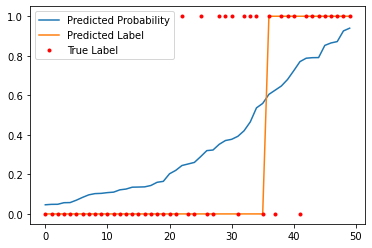

In [ ]:
#test data
dataTest, labelTest = processData('TestData.csv')

import tensorflow as tf
model = tf.keras.models.load_model('myModel_softmax_2_5.h5')

test_predicted = []
for i in range(dataTest.shape[0]):
  item = dataTest[i].reshape(1,6)
  test_predicted.append(model.predict(item)[0][1])

label0 = labelTest
predictedLabel = convertProbToLabel(test_predicted)
result = bitwise_xor(predictedLabel, label0)
print('accuracy', np.sum(result) / result.shape[0])
print('true positive', np.sum(truePos(predictedLabel, label0)))
print('true negative', np.sum(trueNeg(predictedLabel, label0)))
print('false positive', np.sum(falsePos(predictedLabel, label0)))
print('false negative', np.sum(falseNeg(predictedLabel, label0)))

import matplotlib.pyplot as plt
predictedCopy = test_predicted.copy()
labelCopy = labelTest.copy()
predictedLabelCopy = predictedLabel.copy()
indices= np.array(sortResultTest(predictedCopy), dtype='int')
indices = indices.astype(int)

#predictedCopy.sort()
#labelCopy.sort()
#predictedLabelCopy.sort()
out = []
for i in indices:
  out.append(labelCopy[i])

predictedLabel = convertProbToLabel(predictedCopy)

plt.plot(predictedCopy, label='Predicted Probability')
plt.plot(predictedLabel, label='Predicted Label')
plt.plot(out,'r.', label='True Label')

plt.legend()

In [ ]:
#ploting data
import tensorflow as tf
model = tf.keras.models.load_model('myModel_softmax_2_5.h5')
predicted = []
for i in range(data.shape[0]):
  item = data[i].reshape(1,6)
  predicted.append(model.predict(item)[0][1])

print(predicted[:10])


1/1 [==============================] - 0s 22ms/step
[0.79694873, 0.91018766, 0.54264826, 0.7660821, 0.8302754, 0.7576742, 0.6608934, 0.805579, 0.8612978, 0.9544305]


In [ ]:
label0 = label
predictedLabel = convertProbToLabel(predicted)
result = bitwise_xor(predictedLabel, label0)
print('accuracy', np.sum(result) / result.shape[0])
print('true positive', np.sum(truePos(predictedLabel, label0)))
print('true negative', np.sum(trueNeg(predictedLabel, label0)))
print('false positive', np.sum(falsePos(predictedLabel, label0)))
print('false negative', np.sum(falseNeg(predictedLabel, label0)))

accuracy 0.775175644028103
true positive 110.0
true negative 221.0
false positive 68.0
false negative 28.0


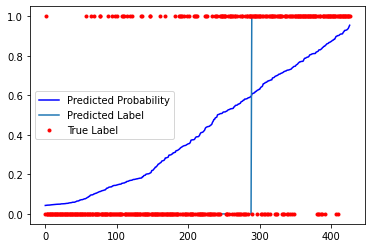

In [ ]:
import matplotlib.pyplot as plt
predictedCopy = predicted.copy()
labelCopy = label.copy()
predictedLabelCopy = predictedLabel.copy()
indices= np.array(sortResult(predictedCopy), dtype='int')
indices = indices.astype(int)

#predictedCopy.sort()
#labelCopy.sort()
#predictedLabelCopy.sort()
out = []
for i in indices:
  out.append(labelCopy[i])

predictedLabel = convertProbToLabel(predictedCopy)

plt.plot(predictedCopy, 'b', label='Predicted Probability')
plt.plot(predictedLabel, label='Predicted Label')
plt.plot(out,'r.', label='True Label')

plt.legend()
plt.show()



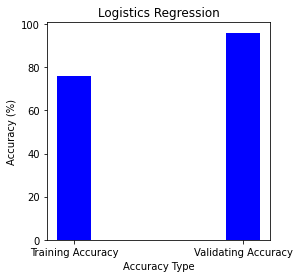

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Training Accuracy':76, 'Validating Accuracy':96}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (4, 4))

# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.2)

plt.xlabel("Accuracy Type")
plt.ylabel("Accuracy (%)")
plt.title("Logistics Regression")
plt.show()

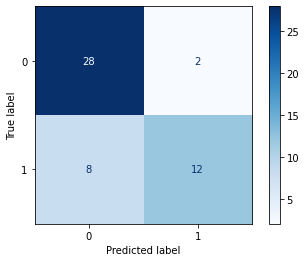

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


y_pred = np.array(predictedLabel)
y_test = np.array(out)
labels = ["0", "1"]

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
truePopulation = data[label > 0.5]
falsePopulation = data[label < 0.5]

print(truePopulation.shape)
print(falsePopulation.shape)
cov1 = np.cov(truePopulation.T)
cov0 = np.cov(falsePopulation.T)
print((cov0))


(178, 6)
(249, 6)
[[ 2.63641659e-02  1.65693552e-02 -1.49836515e-02  1.37713031e-02
   1.62072013e-02 -1.91273057e-03]
 [ 1.65693552e-02  3.64923770e-02 -6.60964603e-03 -7.13180149e-03
  -6.25701261e-03 -5.36874615e-02]
 [-1.49836515e-02 -6.60964603e-03  7.88986023e-02 -7.00540137e-02
  -3.59265722e-02 -1.44916112e-01]
 [ 1.37713031e-02 -7.13180149e-03 -7.00540137e-02  2.50097163e-01
   1.03575593e-01  1.49144967e-01]
 [ 1.62072013e-02 -6.25701261e-03 -3.59265722e-02  1.03575593e-01
   2.47603316e-01  1.24287472e-01]
 [-1.91273057e-03 -5.36874615e-02 -1.44916112e-01  1.49144967e-01
   1.24287472e-01  2.36225547e+00]]


In [ ]:
def convertNaN(A):
  mask = np.isnan(A)
  A[mask] = 0
  return A

def BarlettTest(variances, n, k):
  pooled = (np.sum(np.multiply(variances, n), axis=0))/(np.sum(n) - k)
  nominator = (np.sum(n) - k)*convertNaN(np.log(pooled)) - np.sum(np.multiply((n-1), convertNaN(np.log(variances))), axis=0)
  denominator = 1 + (np.sum(1 / (n  - 1)) - 1/(np.sum(n) - 1))/(3*k - 3)
  return nominator/denominator


variances = np.array([cov0, cov1])
n = np.array([falsePopulation.shape[0], truePopulation.shape[0]]).reshape(2,1,1)
print(BarlettTest(variances, n, 2))

[[  85.62345768  132.19357377    0.           21.13046708  102.15504948
     0.        ]
 [ 132.19357377   22.70374765 1121.80336858 1424.61174842    0.
     0.        ]
 [   0.         1121.80336858   14.07056523    0.            0.
     0.        ]
 [  21.13046708 1424.61174842    0.            2.15246303    3.87849176
    34.84670951]
 [ 102.15504948    0.            0.            3.87849176    1.99764878
    53.9458822 ]
 [   0.            0.            0.           34.84670951   53.9458822
     2.12195772]]


<ipython-input-14-d67b613a8208>:8: RuntimeWarning: invalid value encountered in log
  nominator = (np.sum(n) - k)*convertNaN(np.log(pooled)) - np.sum(np.multiply((n-1), convertNaN(np.log(variances))), axis=0)


# New section